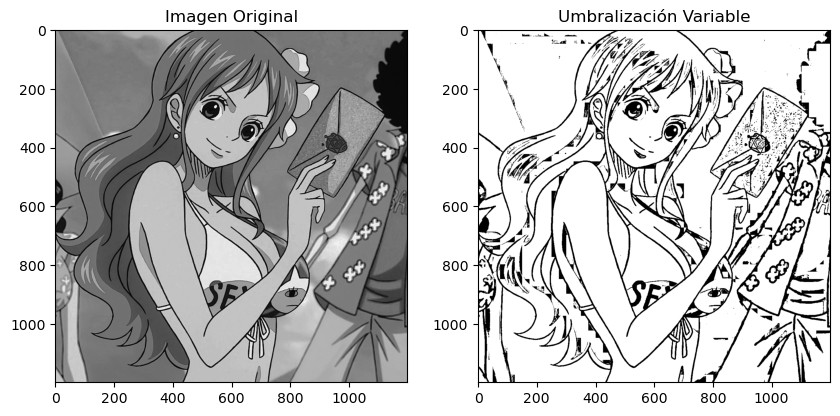

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#variable por bloques

image = cv2.imread('nami.jpg', 0) 
# Función para calcular el umbral variable utilizando la técnica de partición
def variable_threshold(image, block_size, c):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            threshold = block_mean - c
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image
# Definir tamaño de bloque y parámetro de compensación
block_size = 25
c = 10
# Aplicar umbralización variable
threshold_image = variable_threshold(image, block_size, c)
# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title('Umbralización Variable')
plt.show()

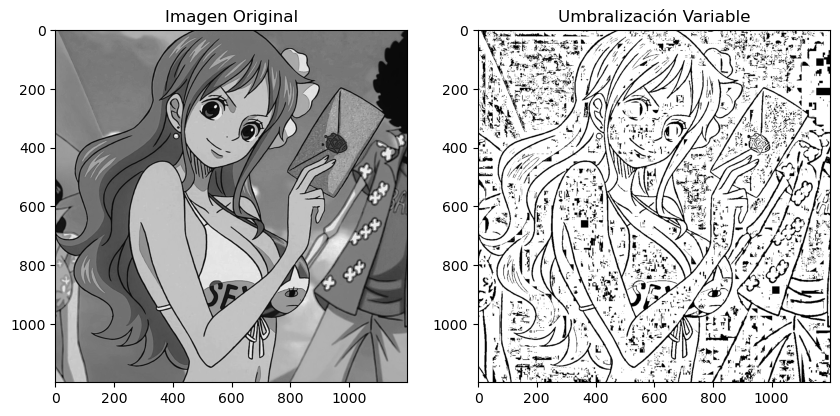

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#variables locales

image = cv2.imread('nami.jpg', 0) 
# Función para calcular el umbral variable utilizando la técnica de variables locales
def local_threshold(image, block_size, threshold_offset):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (threshold_offset * block_std)
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image
# Definir tamaño de bloque y offset de umbral
block_size = 25
threshold_offset = 0.8
# Aplicar umbralización variable
threshold_image = local_threshold(image, block_size, threshold_offset)
# Mostrar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(threshold_image, cmap='gray')
plt.title('Umbralización Variable')
plt.show()

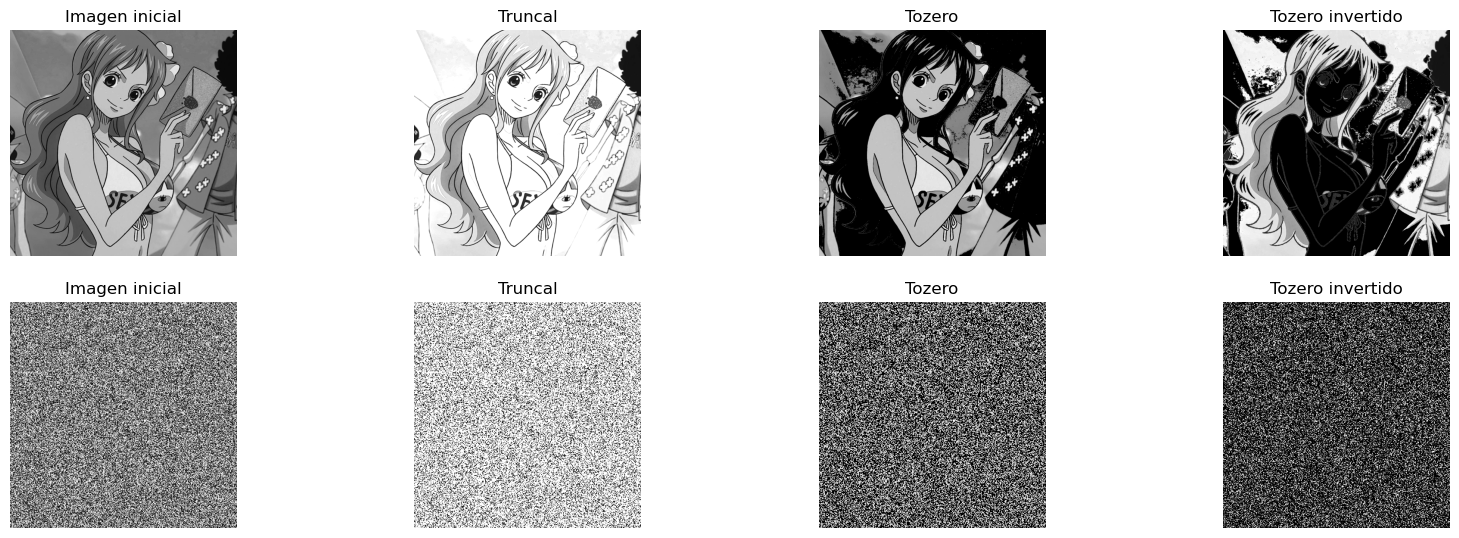

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('nami.jpg',0)
img2=np.random.randint(0,256,(300,300),dtype=np.uint8)

_,umb_trunc = cv2.threshold(img, 127, 200, cv2.THRESH_TRUNC)
_,umb_tozero = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO)
_,umb_tozero_inv = cv2.threshold(img, 127, 200, cv2.THRESH_TOZERO_INV)

_,umb_trunc2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TRUNC)
_,umb_tozero2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TOZERO)
_,umb_tozero_inv2 = cv2.threshold(img2, 127, 200, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(20, 10))

plt.subplot(341)
plt.title('Imagen inicial')
plt.imshow(img, cmap = "gray")
plt.axis('off')

plt.subplot(342)
plt.title('Truncal')
plt.imshow(umb_trunc, cmap='gray')
plt.axis('off')

plt.subplot(343)
plt.title('Tozero')
plt.imshow(umb_tozero, cmap='gray')
plt.axis('off')

plt.subplot(344)
plt.title('Tozero invertido')
plt.imshow(umb_tozero_inv, cmap='gray')
plt.axis('off')

#////////////////////////

plt.subplot(345)
plt.title('Imagen inicial')
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(346)
plt.title('Truncal')
plt.imshow(umb_trunc2, cmap='gray')
plt.axis('off')

plt.subplot(347)
plt.title('Tozero')
plt.imshow(umb_tozero2, cmap='gray')
plt.axis('off')

plt.subplot(348)
plt.title('Tozero invertido')
plt.imshow(umb_tozero_inv2, cmap='gray')
plt.axis('off')

plt.show()

PRACTICA DE LABORATORIO 2 (UMBRALIZACION)    

	Genera una imagen en escala de grises (diferente a la generada en clase)
		(una imagen gradiante o lineal"investigacion")
    	Aplica uno o más métodos de umbralización visto en clases para segmentar 
		la imagen y resaltar diferentes partes del gradiente.
    	Cada una de estas aplicaciones debe estar en métodos distintos de tal
		 manera que solo deberiamos llamar al nombre del metodo y a la imagen que queremos afectar 
	Visualiza la imagen original y las imágenes segmentadas resultantes tituladas 
		con los efectos ralizados correspondientemente .
    

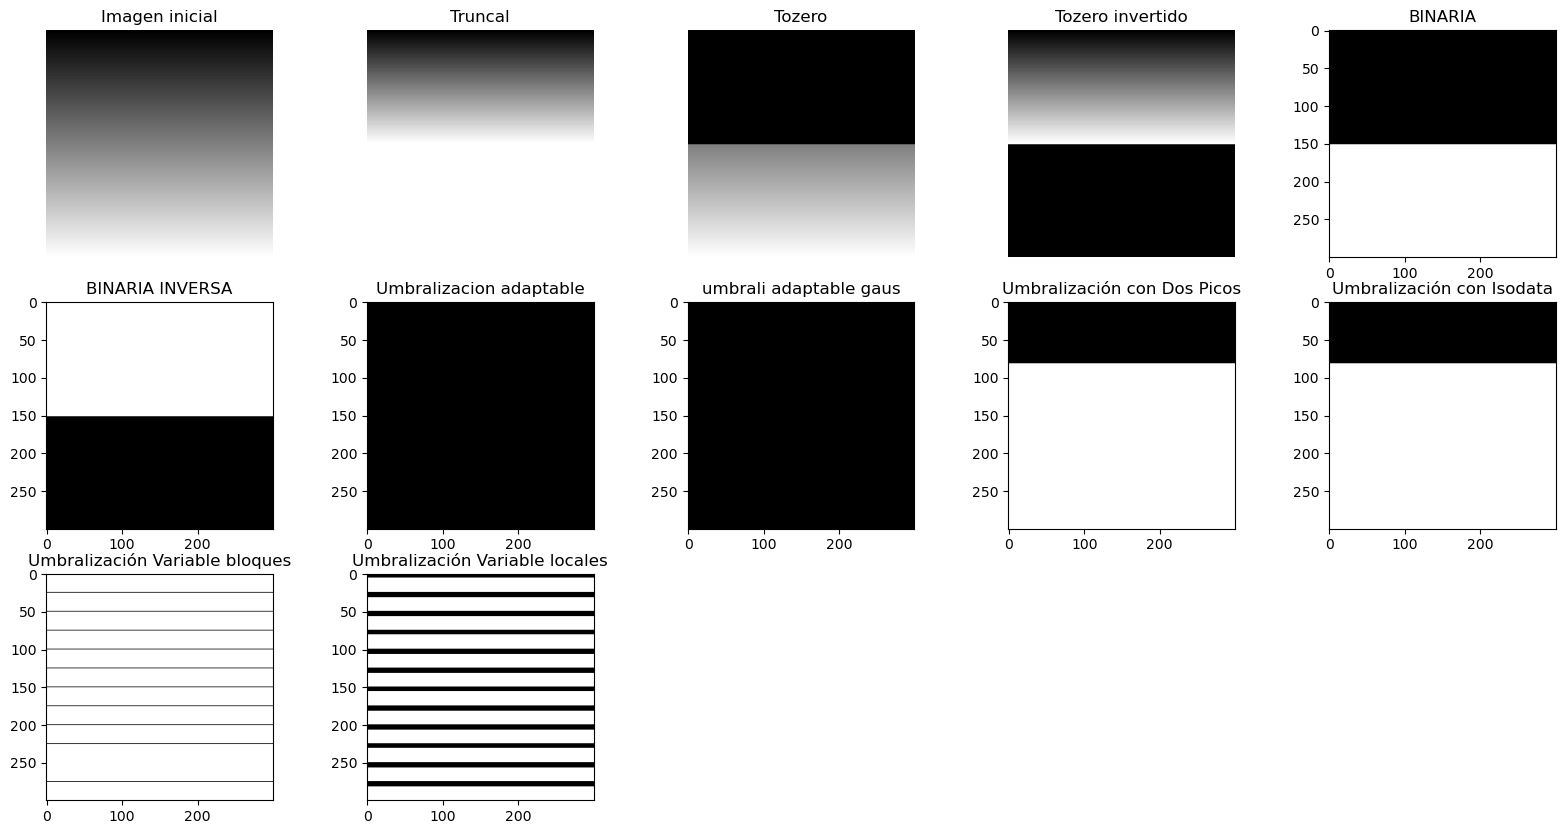

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#gradient_img=cv2.imread('nami.jpg',0)
#gradient_img=np.random.randint(0,256,(300,300),dtype=np.uint8)
# Generar imagen en escala de grises con gradiente lineal
height, width = 300, 300
gradient_img = np.zeros((height, width), dtype=np.uint8)
for i in range(width):
    gradient_img[:, i] = np.linspace(0, 255, height, dtype=np.uint8)


def isodata(image):
    # Umbral inicial decidimos del espectro de 0 a 255
    threshold = 128
    
    while True:
        # Se divide la imagen en dos grupos según el umbral
        
        groupo1 = image[image <= threshold] # grupo donde el umbral es menor o igual al determinado
        groupo2 = image[image > threshold] # grupo donde el umbral es mayor al determinado
        
        # Se calcula la media de cada grupo
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        
        # Nuevo umbral
        nuevo_umbral = (media1 + media2) / 2 # segun formula 
        
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        
        threshold = nuevo_umbral
    
    return threshold

# llamamos a funcion con imagen seleccionada 
umbral_isodata = isodata(gradient_img)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(gradient_img, umbral_isodata, 255, cv2.THRESH_BINARY) #OJO el "_" es una variable pero que ignoramos (almacena el valor del umbral) 


# Función para aplicar la umbralización global con el algoritmo de dos picos
def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    return umbral
# Aplicamos la umbralización global con el algoritmo de dos picos
umbral_dos_picos = dos_picos(gradient_img)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(gradient_img, umbral_dos_picos, 255, cv2.THRESH_BINARY)



#ESTE ES UMBRALIZACION BINARIA
_,umbralbi=cv2.threshold(gradient_img,127,200, cv2.THRESH_BINARY)
_,umbralbi_inc_bi=cv2.threshold(gradient_img,127,200,cv2.THRESH_BINARY_INV)
#umbralizacion adaptable gaussia
umb_adap = cv2.adaptiveThreshold(gradient_img, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
umb_adap_gauss = cv2.adaptiveThreshold(gradient_img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


_,umb_trunc = cv2.threshold(gradient_img, 127, 200, cv2.THRESH_TRUNC)
_,umb_tozero = cv2.threshold(gradient_img, 127, 200, cv2.THRESH_TOZERO)
_,umb_tozero_inv = cv2.threshold(gradient_img, 127, 200, cv2.THRESH_TOZERO_INV)


# Función para calcular el umbral variable utilizando la técnica de partición
def variable_threshold(gradient_img, block_size, c):
    threshold_image = np.zeros_like(gradient_img)
    for y in range(0, gradient_img.shape[0], block_size):
        for x in range(0, gradient_img.shape[1], block_size):
            block = gradient_img[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            threshold = block_mean - c
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image
# Definir tamaño de bloque y parámetro de compensación
block_size = 25
c = 10
# Aplicar umbralización variable
threshold_image = variable_threshold(gradient_img, block_size, c)

#variables locales
# Función para calcular el umbral variable utilizando la técnica de variables locales
def local_threshold(gradient_img, block_size, threshold_offset):
    threshold_image1 = np.zeros_like(gradient_img)
    for y in range(0, gradient_img.shape[0], block_size):
        for x in range(0, gradient_img.shape[1], block_size):
            block = gradient_img[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (threshold_offset * block_std)
            threshold_image1[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image1
# Definir tamaño de bloque y offset de umbral
block_size = 25
threshold_offset = 0.8
# Aplicar umbralización variable
threshold_image1 = local_threshold(gradient_img, block_size, threshold_offset)

plt.figure(figsize=(20, 10))


plt.subplot(351)
plt.title('Imagen inicial')
plt.imshow(gradient_img, cmap = "gray")
plt.axis('off')

plt.subplot(352)
plt.title('Truncal')
plt.imshow(umb_trunc, cmap='gray')
plt.axis('off')

plt.subplot(353)
plt.title('Tozero')
plt.imshow(umb_tozero, cmap='gray')
plt.axis('off')

plt.subplot(354)
plt.title('Tozero invertido')
plt.imshow(umb_tozero_inv, cmap='gray')
plt.axis('off')

plt.subplot(355)
plt.imshow(umbralbi, cmap='gray')
plt.title('BINARIA')

plt.subplot(356)
plt.imshow(umbralbi_inc_bi, cmap='gray')
plt.title('BINARIA INVERSA')

plt.subplot(357)
plt.imshow(umb_adap, cmap='gray')
plt.title('Umbralizacion adaptable')

plt.subplot(358)
plt.imshow(umb_adap_gauss, cmap='gray')
plt.title('umbrali adaptable gaus')

plt.subplot(359)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Dos Picos')

plt.subplot(3,5,10)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Isodata')

plt.subplot(3, 5, 11)
plt.imshow(threshold_image, cmap='gray')
plt.title('Umbralización Variable bloques')

plt.subplot(3, 5, 12)
plt.imshow(threshold_image1, cmap='gray')
plt.title('Umbralización Variable locales')

plt.show()